### 0. Google Colab 환경 세팅

- 런타임 유형 변경: T4 GPU (저장)

### 1. 내 드라이브 연결 (1~2분 소요)

- 내 드라이브 연결
- 작업 Directory 이동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# practice로 폴더 생성하지 않고 본인의 폴더명을 별도로 설정하였을 경우, 해당 폴더명을 넣어주기
%cd ./drive/MyDrive/practice

/content/drive/MyDrive/practice


In [3]:
# 현재 directory 확인
%pwd

'/content/drive/MyDrive/practice'

### 2. 분석에 필요한 모듈 및 라이브러리 설치

- Google colab에서 기본적으로 제공하는 모듈도 있음
- 이 외 모듈은 pip install 명령어를 통해 설치
- 설치에는 2~3분 소요

In [4]:
# pip install 설치 명령어

# 한국어 형태소 분석기
!pip install konlpy
!pip install kiwipiepy

# 데이터 - excel 파일 열기
!pip install openpyxl

# 모델
!pip install keybert
!pip install bertopic
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813256 sha256=89d5612b9c742ddc3c745e83fcc559fa04367b4339a529d955e382e3e26106af
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.8.3-py3-none-any.whl size=39124 sh

### 3. 설치된 모듈 및 라이브러리 불러오기

In [5]:
# 데이터 처리
import pandas as pd
import numpy as np

# 진행 과정 시각화
from tqdm.notebook import tqdm

# 한국어 형태소 분석기
from kiwipiepy import Kiwi
from konlpy.tag import *

# 모델
from keybert import KeyBERT
from bertopic import BERTopic

# 임베딩 모델
from transformers import AutoModel, AutoTokenizer
from sentence_transformers import SentenceTransformer

### 4. 분석할 데이터 불러오기

- 소아암 생존자 Question 데이터셋

In [10]:
#  데이터 읽기
df = pd.read_excel('data1.xlsx')

# 데이터 첫 5행 읽기
df.head()

# 마지막 5행 읽기
# df.tail()

,question
0,피로도에 따른 쉼을 어떻게 갖고 계십니까?
1,암완치자이기 때문에 일반인과 다른 생활 모습은 어떤 것이 있습니까?
2,완치자들의 모임을 소개받을 수 있을까요?
3,진학관련 상담을 받을 수 있을까요?
4,동일한 병명으로 치료받은 완치자를 만날 수 있을까요?


In [11]:
# 데이터 확인

# 데이터 컬럼명 확인
print(df.columns)

# 데이터 정보 확인
df.info()

# 데이터 길이 확인
len(df)

Index(['question'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


500

### 5. 형태소 분석

- konlpy: https://konlpy.org/ko/v0.4.3/api/konlpy.tag/
- kiwi: https://github.com/bab2min/Kiwi

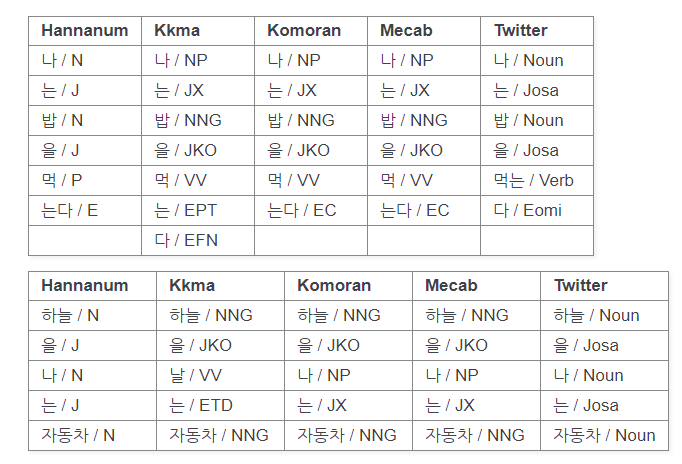

In [12]:
# 형태소 분석기 이름 지정
# Konlpy
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

# kiwi
kiwi = Kiwi()

In [13]:
text = '소아암 생존자를 위한 챗봇 개발'

# 형태소 분석기명.함수명(분석하고자 하는 텍스트)
print(hannanum.analyze(text))
print(hannanum.morphs(text))
print(hannanum.nouns(text))
print(hannanum.pos(text))

[[[('소아', 'ncn'), ('암', 'ncn')]], [[('생존자', 'ncn'), ('를', 'jco')], [('생존', 'ncpa'), ('자', 'ncn'), ('를', 'jco')]], [[('위하', 'pvg'), ('ㄴ', 'etm')]], [[('챗봇', 'ncn')], [('챗봇', 'nqq')]], [[('개발', 'ncn')], [('개발', 'ncpa')]]]
['소아암', '생존자', '를', '위하', 'ㄴ', '챗봇', '개발']
['소아암', '생존자', '챗봇', '개발']
[('소아암', 'N'), ('생존자', 'N'), ('를', 'J'), ('위하', 'P'), ('ㄴ', 'E'), ('챗봇', 'N'), ('개발', 'N')]


In [14]:
kiwi.analyze(text)

[([Token(form='소아', tag='NNG', start=0, len=2),
   Token(form='암', tag='NNG', start=2, len=1),
   Token(form='생존자', tag='NNG', start=4, len=3),
   Token(form='를', tag='JKO', start=7, len=1),
   Token(form='위하', tag='VV', start=9, len=2),
   Token(form='ᆫ', tag='ETM', start=10, len=1),
   Token(form='챗봇', tag='NNG', start=12, len=2),
   Token(form='개발', tag='NNG', start=15, len=2)],
  -87.31249237060547)]

In [15]:
# NNG: 일반명사, NNP: 고유명사, NNB: 의존명사, NR: 수사, NP: 대명사

def noun_extractor(text):
  """"
  명사 형태만 추출
  """
  nouns = [] # list

  result = kiwi.analyze(text)
  for token, pos, _, _ in result[0][0]:
    # if len(token) != 1 and pos.startswith('N'): # 한글자가 아닌 명사형태만 추출
    if pos.startswith('N'): # 한글자가 아닌 명사형태만 추출
      nouns.append(token) # list에 해당 단어를 더해줌

  return nouns

In [16]:
noun_extractor(text)

['소아', '암', '생존자', '챗봇', '개발']

In [17]:
df['question']

0                                피로도에 따른 쉼을 어떻게 갖고 계십니까?
1                  암완치자이기 때문에 일반인과 다른 생활 모습은 어떤 것이 있습니까?
2                                 완치자들의 모임을 소개받을 수 있을까요?
3                                    진학관련 상담을 받을 수 있을까요?
4                          동일한 병명으로 치료받은 완치자를 만날 수 있을까요?
                             ...                        
495                       암 진단을 받았을 때, 처음에 어떤 감정을 느끼셨나요?
496    가족이나 친구들에게 이 질병을 알리는 것에 대해 고민하셨던 적이 있나요? 어떻게 하...
497                          암과 관련된 정서적인 부분을 어떻게 극복하셨나요?
498                                 치료 중 건강관리는 어떻게 하셨나요?
499                                이러한 질병에 걸린 이유가 무엇인가요?
Name: question, Length: 500, dtype: object

In [18]:
# question에 대해서만 분석 진행

my_df = df['question'].tolist() # Series to List
my_docs = ' '.join(my_df) # List to String
my_docs

'피로도에 따른 쉼을 어떻게 갖고 계십니까? 암완치자이기 때문에 일반인과 다른 생활 모습은 어떤 것이 있습니까? 완치자들의 모임을 소개받을 수 있을까요? 진학관련 상담을 받을 수 있을까요? 동일한 병명으로 치료받은 완치자를 만날 수 있을까요? 사회적응을 한 완치자와 맨토맨티 관계를 형성할 수 있을까요?  환자 가정에 형제자매들의 케어에 대해 물어볼 수 있을까요? 보호자의 케어는 어떻게 되어야 할까요? 치료 후 운동은 어떻게 하나요? 후유증 관리는 어떻게 진행되나요? 빠진 머리카락은 언제쯤 날까요? 예전처럼 똑같이 머리가 다시 자라나요? 다시 일상생활로 돌아갈수 있나요? 체력은 문제 없을까요? 마스크는 계속 써야 하나요? 직장을 구할때 병력을 말해야 할까요? 숨겨야 할까요? 언제까지 음식을 제한하면서 먹어야 하나요? 일상생활하면서 음식을 자유롭게 먹을수 있을까요? 헌혈을 할수 있나요? 나중에 아이를 낳을수 있을까요? 소아암으로 인해 다른 암에 걸릴 확률이 높아지나요? 이성을 사기게 되거나 결혼를 할때 말해야 하나요? 직장생활을 하거나 학교에 갈때 체력적으로 문제가 없나요? 치료가 끝난 후 발생되는 건강상의 문제에대한 해결방법 면접시 소아암 앓았던 과거 밝히는지 진로는 어느쪽으로 가는지 취업시 고려하는사항 건강관리 방법 후유증으로 어떤걸 앓고있는지 사회생활에 소아암 관련하여 문제 없는지 직장내에서 소아암 이력 밝히는지 결혼에 대한 생각 결혼했다면 자녀에 대한 생각 치료 중 먹어도 되는 음식, 안되는 음식, 이것을 먹어도 될까요? 연애나 결혼시 나의 병력을 어떻게 언제 공개해야하나? 학교 활동을 할 때 안되는 영역(체육, 캠프 등) 검정고시를 보고 학교에 가도 될까요? 학교 진학시 배려받을 수 있는 부분이 있을까요? 보험 가입시 어떻게 선택해야하는 것이 좋은가요? 기초 면역력을 올리는 생활방법 이 궁금합니다. 체력이 아니라 바이러스에 취약하기 때문에 궁금합니다. 해외여행시 주의해야할 점이 궁금합니다.  구토 증세를 완화할 수 있는 방법이 궁금합니다. 암 환자는 장기

In [21]:
# text에서 명사만 추출하여 저장
df_nouns = noun_extractor(my_docs)
# df_nouns

# list to text 형태로 변경
noun_docs = ' '.join(df_nouns)
noun_docs

'피로도 쉼 완치자 때문 일반인 생활 모습 것 완치자 모임 소개 수 진학 관련 상담 수 병명 치료 완치자 수 사회 적응 완치자 맨토맨티 관계 형성 수 환자 가정 형제 자매 케어 수 보호자 케어 치료 후 운동 후유증 관리 진행 머리카락 언제쯤 나 예전 머리 일상생활 수 체력 문제 마스크 직장 때 병력 말 언제 음식 제한 일상 생활 음식 자유 수 헌혈 수 나중 아이 수 소아 암 암 확률 이성 사기 결혼 르 때 말 직장 생활 학교 때 체력 문제 치료 후 발생 건강 문제 해결 방법 면 접시 소아 암 과거 진로 쪽 취업 시 고려 사항 건강 관리 방법 후유증 거 사회생활 소아 암 관련 문제 직장 내 소아 암 이력 결혼 생각 결혼 자녀 생각 치료 중 음식 음식 이것 연애 결혼 시 나 병력 공개 학교 활동 때 영역 체육 캠프 등 검정고시 학교 학교 진학 시 배려 수 부분 보험 가입 시 선택 것 기초 면역력 생활 방법 체력 바이러스 취약 때문 해외 여행 시 주의 점 구토 증세 완화 수 방법 암 환자 장기 기증 조혈 모 기증 암 환자 암 보험 가입 수 취업 진학 시 해외 파견 출장 시 이익 것 대응 수 학교 복귀 시 학우 항암 치료 또래 친구 입학 학년 아래 때 불편 항암 치료 때 식이요법 사람 항암 치료 이야기 완치 후 남자 경우 군 면제 친구 경우 항암 치료 것 항암 치료 때 걱정 항암 치료 과거 취업 때 이익 이성 교제 경우 상대방 말 고민 항암 치료 후 체력 관리 항암 치료 때 부모 갈등 때 해결 완치 후 학교 때 친구 소아 암 친구 소아 암 소개 학습 부족 부분 해결 후유증 발생 때 치료 사례 후유증 실망감 우울감 위로 방법 완치 후 인간관계 을 외모 모습 사람 시선 극복 완치 후유증 경우 경제 지원 가능 완치 후 경험자 기회 사회생활 때 소아 암 사실 말 취업 시 소아 암 경험자 암 치료 후 학교 복귀 때 친구 수 방법 치료 종결 후 학교 복귀 때 적응 데 어려움 암 치료 과정 힘 마음 위로 방법 힘 치료 과정 생각 진로 결정 데 도움 만 활동 등 무엇 대입 치료 종

### 6. 키워드 분석

- Keybert: https://github.com/MaartenGr/KeyBERT
- Keybert 참고문헌2: https://wikidocs.net/159467
- sbert: https://www.sbert.net/docs/pretrained_models.html

**Keybert 모델 parameter**

*   keyphrases_ngram_range: 키워드/키구문의 길이 지정
*   stop_words: 불용어 지정
*   highlight: 문서 내에서 키워드 highlight (True/False)
*   use_maxsum: 결과 다양성을 위한 파라미터 (True/False)
*   use_mmr: 결과 다양성을 위한 파라미터 (True/False)
*   diverisity: 다양성 정도 (0~1)
*   top_n: 최종 키워드 개수 설정

In [37]:
# 키워드 분석

sbert_model = "paraphrase-multilingual-mpnet-base-v2" #사전학습 모델
#model = AutoModel.from_pretrained("klue/bert-base")

keymodel = KeyBERT(sbert_model)

In [35]:
# my_docs: 기본 데이터셋 / noun_docs: 명사 형태만 추출한 데이터셋
key_nouns_v1 = keymodel.extract_keywords(noun_docs, keyphrase_ngram_range=(1,1), top_n=20)
key_nouns_v1

[('평생', 0.605),
 ('세상', 0.5824),
 ('상태', 0.5666),
 ('가발', 0.5615),
 ('위로', 0.5604),
 ('또래', 0.558),
 ('구체제으', 0.5523),
 ('중장년', 0.5501),
 ('사실', 0.5473),
 ('아이', 0.5458),
 ('수도', 0.5422),
 ('병원', 0.5415),
 ('상황', 0.5371),
 ('아빠', 0.5326),
 ('진로', 0.5317),
 ('이거', 0.531),
 ('소개', 0.53),
 ('지금', 0.5261),
 ('어떻개', 0.5233),
 ('기형아', 0.5224)]

In [36]:
key_nouns_v2 = keymodel.extract_keywords(my_docs, keyphrase_ngram_range=(1,1), use_maxsum=True, diversity=1, top_n=10)
key_nouns_v2

[('환자로서', 0.3959),
 ('사회생활의', 0.4053),
 ('경험자들의', 0.4224),
 ('투병경험', 0.4353),
 ('치료후', 0.4378),
 ('사회배려자전형과', 0.4496),
 ('건강관리', 0.4584),
 ('환자들의', 0.4669),
 ('치료하는방법', 0.4701),
 ('심리상담을', 0.5213)]

#### Option - 시각화 (WordCloud)

- 단어 색상 참조: https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [25]:
!pip install WordCloud

In [26]:
# 한국어 폰트 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath='/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font=fm.FontProperties(fname=fontpath,size=9)

In [27]:
from PIL import Image
masking_image = np.array(Image.open("cloud.png"))

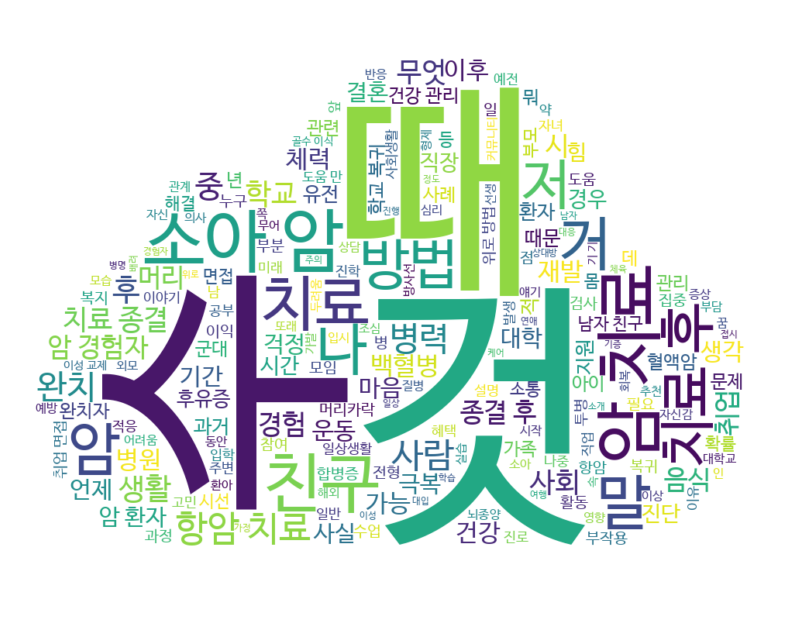

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud=WordCloud(font_path=fontpath,
                    background_color='white', # white / black
                    # max_words = 100,
                    # max_font_size = 100,
                    #colormap = 'coolwarm',
                    mask = masking_image
                    )
wordcloud.generate(noun_docs)

fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# 이미지 저장
# fig.savefig('wordcloud_result.png')

### 7. 토픽 모델링 (Topic Modeling)

#### 1) Clustering - DBSCAN

In [38]:
noun_list = []

for question in tqdm(my_df):
  words = noun_extractor(question)
  noun_list.append(words)


dbscan_df = pd.DataFrame() # 데이터 프레임 생성
dbscan_df['question'] = my_df
dbscan_df['nouns'] = noun_list

dbscan_df.head()

  0%|          | 0/500 [00:00<?, ?it/s]

,question,nouns
0,피로도에 따른 쉼을 어떻게 갖고 계십니까?,"[피로도, 쉼]"
1,암완치자이기 때문에 일반인과 다른 생활 모습은 어떤 것이 있습니까?,"[완치자, 때문, 일반인, 생활, 모습, 것]"
2,완치자들의 모임을 소개받을 수 있을까요?,"[완치자, 모임, 소개, 수]"
3,진학관련 상담을 받을 수 있을까요?,"[진학, 관련, 상담, 수]"
4,동일한 병명으로 치료받은 완치자를 만날 수 있을까요?,"[병명, 치료, 완치자, 수]"


In [39]:
data = [" ".join(word) for word in dbscan_df['nouns']]
data

['피로도 쉼',
 '완치자 때문 일반인 생활 모습 것',
 '완치자 모임 소개 수',
 '진학 관련 상담 수',
 '병명 치료 완치자 수',
 '사회 적응 완치자 맨토맨티 관계 형성 수',
 '환자 가정 형제 자매 케어 수',
 '보호자 케어',
 '치료 후 운동',
 '후유증 관리 진행',
 '머리카락 언제쯤 나 예전 머리',
 '일상생활 수 체력 문제',
 '마스크',
 '직장 때 병력 말',
 '언제 음식 제한 일상 생활 음식 자유 수',
 '헌혈 수',
 '나중 아이 수',
 '소아 암 암 확률',
 '이성 사기 결혼 르 때 말',
 '직장 생활 학교 때 체력 문제',
 '치료 후 발생 건강 문제 해결 방법',
 '면접 시 소아 암 과거',
 '진로 쪽',
 '취업 시 고려 사항',
 '건강관리 방법',
 '후유증 거',
 '사회생활 소아 암 관련 문제 지',
 '직장 내 소아 암 이력',
 '결혼 생각',
 '결혼 자녀 생각',
 '치료 중 음식 음식 이것',
 '연애 결혼 시 나 병력 공개',
 '학교 활동 때 영역 체육 캠프 등',
 '검정고시 학교',
 '학교 진학 시 배려 수 부분',
 '보험 가입 시 선택 것',
 '기초 면역력 생활 방법 체력 바이러스 취약 때문',
 '해외 여행 시 주의 점',
 '구토 증세 완화 수 방법',
 '암 환자 장기 기증 조혈 모 기증',
 '암 환자 암 보험 가입 수',
 '취업 진학 시',
 '해외 파견 출장 시 이익 것 대응 수',
 '학교 복귀 시 학우',
 '항암 치료 또래 친구 입학 학년 아래 때 불편',
 '항암 치료 때 식이요법',
 '사람 항암 치료 이야기',
 '완치 후 남자 경우 군 면제 친구 경우 항암 치료 것',
 '항암 치료 때 걱정',
 '항암 치료 과거 취업 때 이익',
 '이성 교제 경우 상대방 말 고민',
 '항암 치료 후 체력 관리',
 '항암 치료 때 부모 갈등 때 해결',
 '완치 후 학교 때 친구 소아 암',
 '친구 소아 암 소개',
 '학습 부족 부분 해결',
 '후유

**Vectorizer 선택**
- 자연어 처리에서 특징 추출이란? 텍스트 데이터에서 단어나 문장들을 어떤 특징값으로 바꿔주는 것을 의미.
- 기존에 문자로 구성되어 있던 데이터를 모델에 적용할 수 있도록 특징을 뽑아 어떤 값으로 바꿔서 수치화

*   CountVectorizer: 단순히 각 텍스트에서 단어 빈도 수를 기준으로 특징 추출
*   HasingVectorizer: CountVectorizer와 동일하지만 hash 함수 사용, 텍스트의 크기가 클수록 효율적
*   TfidVectorizer: TF-IDF 값을 사용해 텍스트에서 특징 추출



In [40]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
hash_vectorizer = HashingVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [62]:
# vectorizer 학습
tfidf_vectorizer.fit(data)
vector = tfidf_vectorizer.transform(data).toarray()

from sklearn.cluster import DBSCAN

# DBSCAN 학습
# eps: 문서 사이의 거리, min_samples: cluster를 이루는 최소 문서의 갯수
model = DBSCAN(eps=0.4, min_samples=5, metric="cosine")
result = model.fit_predict(vector)

In [63]:
result

array([-1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1,  3, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,  2, -1,  5, -1,
       -1, -1, -1,  2, -1,  4, -1, 11, -1, -1, -1, -1,  2,  0, -1, -1, -1,
        3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1,  5,  4, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  4,  4, -1, -1, -1, -1, -1, -1, -1,  6, -1,
        6, -1, -1, -1,  4, -1, -1, -1, -1, -1,  6, -1, -1, -1,  7, -1, -1,
        9,  1, -1,  1, -1,  3, -1, -1, -1, -1,  7, -1, -1,  4, -1, -1, -1,
       -1, -1,  4, -1, -1, -1, -1,  3, -1,  7, -1, -1, -1, -1, -1,  2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  8, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  7, -1,  9, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  9,  1, -1

In [64]:
# 데이터에 결과 결합
dbscan_df['result'] = result
dbscan_df.head()

,question,nouns,result
0,피로도에 따른 쉼을 어떻게 갖고 계십니까?,"[피로도, 쉼]",-1
1,암완치자이기 때문에 일반인과 다른 생활 모습은 어떤 것이 있습니까?,"[완치자, 때문, 일반인, 생활, 모습, 것]",-1
2,완치자들의 모임을 소개받을 수 있을까요?,"[완치자, 모임, 소개, 수]",-1
3,진학관련 상담을 받을 수 있을까요?,"[진학, 관련, 상담, 수]",-1
4,동일한 병명으로 치료받은 완치자를 만날 수 있을까요?,"[병명, 치료, 완치자, 수]",-1


In [65]:
# 총 몇개의 Clustering이 만들어졌는지 확인
set(result)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [66]:
# 결과 확인
for cluster_num in set(result):
  # -1, 0 noise, not clustered

  if (cluster_num == -1 or cluster_num == 0):
    continue

  else:
    print("cluster num: {}".format(cluster_num))
    temp_df = dbscan_df[dbscan_df['result'] == cluster_num]
    for question in temp_df['question']:
      print(question)
    print()

cluster num: 1
치료 중 먹어도 되는 음식, 안되는 음식, 이것을 먹어도 될까요?
치료후 조심해야하는음식이나 멀리해야하는 음식이 있나요?
항암할때 좋은 음식은?
먹지 말아야 할 음식이 있을까요?
음식을 좋아하는 것만먹어도 되는지
음식은은 이제  다 먹어도 되나요?

cluster num: 2
암 치료가 끝난 후 학교로 복귀할 때 친구들과 다시 가까워질 수 있는 방법이 있을까요?
치료가 끝난 후 학교로 복귀할 때 친구들에게 어느정도 선까지 밝히는게 좋을까요?
학교에 복귀한다면 친구들에게 암환자라는걸 밝혀야할까요?
다른 소아암 친구들은 잘하는게 많고 하고싶은게 많은데 그런 친구들을 보니 생각이 많아져요 어떡하면 좋을지 모르겠어요
잘 걷는 방법 알려주세요
친구들과 가까이 지내고 싶은데 제 안의 벽이 있어요 어떻게 다가가야할까요?
학교 복귀후 친구들과의 소통
친구들이 신기하게 물어보면 자세하게 말하는게 맞을까요..?
암걸린거를 친구들에게 알려야하나요
친구들한테 말해도될까요?
다른친구들이 저랑 안놀까봐 무서워요
친구들에게 암 치료를 말 안할 수 있는 방법 있을까요?

cluster num: 3
항암치료를 할 때 안좋게 될까봐 걱정이 많은데 어떻게 해야 할까요?
앞으로 건강관리를 어떻게 하면 좋을까요?
건강에 대해 지나치게 예민해져요. 걱정을 그만하고 싶어요.
건강관리는 어떻게 해야하나요?
넘어져서 피가 나면 어떻게 할까 걱정해본 적이 있나요?
시간이 지나면 건강해질까요?
부모님이 항상 건강을 걱정하시는데 이젠 걱정말라고 할까요?
또 암이 걸릴수있을까봐 걱정이 되요 어쩌지요?
제가 건강하고 오래 살수있을까요?
어떻게 건강관리 하는지?
치료 중 건강관리는 어떻게 하셨나요?

cluster num: 4
면접시 소아암 앓았던 과거 밝히는지
취업이나 진학시 밝히지 않아도 괜찮나요?
취업시 소아암 경험자였음을 밝혀야 할까요?
취업할 때 소아암 병력을 꼭 말해야 할까요?
취업면접을볼때 내가 암에걸렸던게 문제가될까요?
취업면접을 볼 때 내가 암에 걸렸던 것을 말해야 할까요

#### 2) BERTopic을 이용한 토픽 모델링

- BERTopic: https://maartengr.github.io/BERTopic/getting_started/parameter%20tuning/parametertuning.html
- BERTopic 참고문헌2: https://wikidocs.net/162076
- sbert: https://www.sbert.net/docs/pretrained_models.html

In [75]:
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

topic_model = BERTopic(embedding_model= 'paraphrase-multilingual-mpnet-base-v2',
                 ctfidf_model=ctfidf_model,
                 nr_topics = 5,
                 top_n_words = 10,
                 calculate_probabilities=True)

topics, probs = topic_model.fit_transform(my_df)

**토픽 모델링 결과 - 시각화**

In [77]:
# 생성된 토픽을 빈도순으로 볼 수 있음
# -1의 값은 outlier에 해당함 (어떤 topic에도 속하지 못한 것)
freq = topic_model.get_topic_info()
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,16,-1_담배를_머리가_기간_1달,"[담배를, 머리가, 기간, 1달, 이런것들이, 건강해지는데, 날까요, 갈수, 걸리는...","[술, 담배를 못하는데 사회생활을 할 때 이런것들이 없어도 괜찮나요?, 빠진 머리카..."
1,0,273,0_어떻게_있을까요_있는_치료,"[어떻게, 있을까요, 있는, 치료, 너무, 좋을까요, 다시, 학교, 있나요, 하나요]",[제가 가발을 벗은걸 남자친구에게 보여주면 헤어지는 경우가 있어요.. 보여줄수도 안...
2,1,180,1_소아암_암에_다른_있나요,"[소아암, 암에, 다른, 있나요, 내가, 친구들에게, 치료, 좋을까요, 할까요, 암이]","[취업면접을 볼 때 내가 암에 걸렸던 것을 말해야 할까요?, 취업면접을 볼 때 내가..."
3,2,18,2_되는_먹어도_음식이_음식을,"[되는, 먹어도, 음식이, 음식을, 음식은, 음식, 먹어야, 집중, 준비물은, 안생기게]",[언제까지 음식을 제한하면서 먹어야 하나요? 일상생활하면서 음식을 자유롭게 먹을수 ...
4,3,13,3_취업을_직장을_직업을_할때,"[취업을, 직장을, 직업을, 할때, 밝히지, 놨으면, 구할때, 해도, 괜찮겠습니까,...","[취업을 할때 저의 병력을 회사에 밝히는게 좋을까요?, 제가 어떤 직업을 하긴 하는..."


In [79]:
topic_model.get_topic(3) # (topic)에 주로 등장하는 단어 볼 수 있음

[('취업을', 1.0684702724293345),
 ('직장을', 0.9387884187375805),
 ('직업을', 0.8724023242614675),
 ('할때', 0.7889656804323928),
 ('밝히지', 0.7442077575529862),
 ('놨으면', 0.7442077575529862),
 ('구할때', 0.7442077575529862),
 ('해도', 0.7442077575529862),
 ('괜찮겠습니까', 0.7442077575529862),
 ('일을', 0.7442077575529862)]

In [80]:
topic_model.visualize_topics()

In [81]:
topic_model.visualize_barchart()

In [82]:
topic_model.visualize_heatmap()

In [73]:
topic_model.get_representative_docs()

{-1: ['담배를 멀리해야 하나요?',
  '술, 담배를 못하는데 사회생활을 할 때 이런것들이 없어도 괜찮나요?',
  '집안 매일 소독을 해야되나요?'],
 0: ['치료 중 먹어도 되는 음식, 안되는 음식, 이것을 먹어도 될까요?',
  '집중 치료 기간 동안 먹어도 되는 음식은?',
  '언제까지 음식을 제한하면서 먹어야 하나요? 일상생활하면서 음식을 자유롭게 먹을수 있을까요?'],
 1: ['취업면접을 볼 때 내가 암에 걸렸던 것을 말해야 할까요?',
  '소아암 경험자는 삶을 살아가는데 신체적으로 약하고 정신적으로도 상처가 많습니다. 또, 재정적으로도 많이 어려운 경우가 있습니다. 소아암 완치자라고 하더라도 치료 종결 후 사회로 복귀하여 혹독한 환경속에서 악착같이 살아가고 있는 이들을 위해 정말 많은 변화가 필요하고 많은 지원이 필요합니다. ',
  '취업면접을 볼 때 내가 암에 걸렸던 것을 말해야 할까요?'],
 2: ['취업을 할때 저의 병력을 회사에 밝히는게 좋을까요?',
  '제가 어떤 직업을 하긴 하는데, 다른 직업도 생각해 놨으면 어떻게 합니까?',
  '아무리 심한 휴유증을 앓고 있더라도 실습이나 취업을 가능하게 해줍니까?'],
 3: ['제가 걸린 암이 혹시 미래의 자녀에게 유전이 되는걸까요 ?',
  '소아암 경험이 추후 출산에 큰 영향을 줄까요?(무정자, 난임, 기형아 등)',
  '소아암 경험자들끼리 결혼하면 아이는 머리가 얇거나 다른 휴유증을 앓고 태어나는 것은 아닙니까?'],
 4: ['제 주변에 같이 치료 받았던 친구들이 다 죽었어요. 너무 힘들어요. 어떻게 해야 할까요?',
  '제가 가발을 벗은걸 남자친구에게 보여주면 헤어지는 경우가 있어요.. 보여줄수도 안보여줄수도 없는데 어떻게 해야할까요? ',
  '타지에 살고 있는데 치료병원이 수도권에 있어서 숙박이 어려워요. 소독이 잘되어 있는 숙박시설 있을까요?'],
 5: ['학교 수업에 모두 참여하기 위해 체력을 기르고 싶은데 어떤 운동을 하는게 도움이 될까요?',
  '치

In [74]:
new_question = '하루 하루가 너무 피곤하고 지쳐요. 어떻게 하면 좋을까요?'
topics, probs = topic_model.transform([new_question])
print('예측한 토픽 번호:', topics)

예측한 토픽 번호: [-1]
